# DATA
[Our World In Data (CO2 Data)](https://github.com/owid/co2-data/tree/master)

# IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from plotly.subplots import make_subplots

# LOAD DATA

In [ ]:
df_owid = pd.read_csv('/content/owid-co2-data.csv')

In [ ]:
df_owid.shape

(50598, 79)

In [ ]:
df_owid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50598 entries, 0 to 50597
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50598 non-null  object 
 1   year                                       50598 non-null  int64  
 2   iso_code                                   42142 non-null  object 
 3   population                                 40008 non-null  float64
 4   gdp                                        14564 non-null  float64
 5   cement_co2                                 24974 non-null  float64
 6   cement_co2_per_capita                      22714 non-null  float64
 7   co2                                        31349 non-null  float64
 8   co2_growth_abs                             28944 non-null  float64
 9   co2_growth_prct                            25032 non-null  float64
 10  co2_including_luc     

This data has a lot of missing values.

**co2**: Annual total production-based emissions of carbon dioxide (CO₂), excluding land-use change, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.

In [ ]:
min_co2 = df_owid['co2'].min()
max_co2 = df_owid['co2'].max()

print(f"Minimum CO2 Emissions: {min_co2:.2f} Million Tonnes")
print(f"Maximum CO2 Emissions: {max_co2:.2f} Million Tonnes")

Minimum CO2 Emissions: 0.00 Million Tonnes
Maximum CO2 Emissions: 37123.85 Million Tonnes


# EDA

### CO2 Emissions over Time


In [ ]:
# Line plot of CO2 emissions over time for a specific country using Plotly
def plot_co2_lineplot(df, country_name):
    country_df = df[df['country'] == country_name]

    # Create the Plotly figure
    fig = go.Figure()

    # Add the line plot for CO2 emissions over time
    fig.add_trace(go.Scatter(
        x=country_df['year'],
        y=country_df['co2'],
        mode='markers+lines',
        marker=dict(size=5),
        line=dict(width=2),
        name='CO2 Emissions'
    ))

    # Update the layout
    fig.update_layout(
        title=f'CO2 Emissions over Time for {country_name}',
        xaxis_title='Year',
        yaxis_title='CO2 Emissions (Million Tonnes)',
        showlegend=True,
        legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
    )

    # Show the Plotly figure
    fig.show()

plot_co2_lineplot(df_owid, 'World')

From the above plot we can see that CO2 emissions have been rising steadily with an exception of year 2020 where there is a drop due to covid.

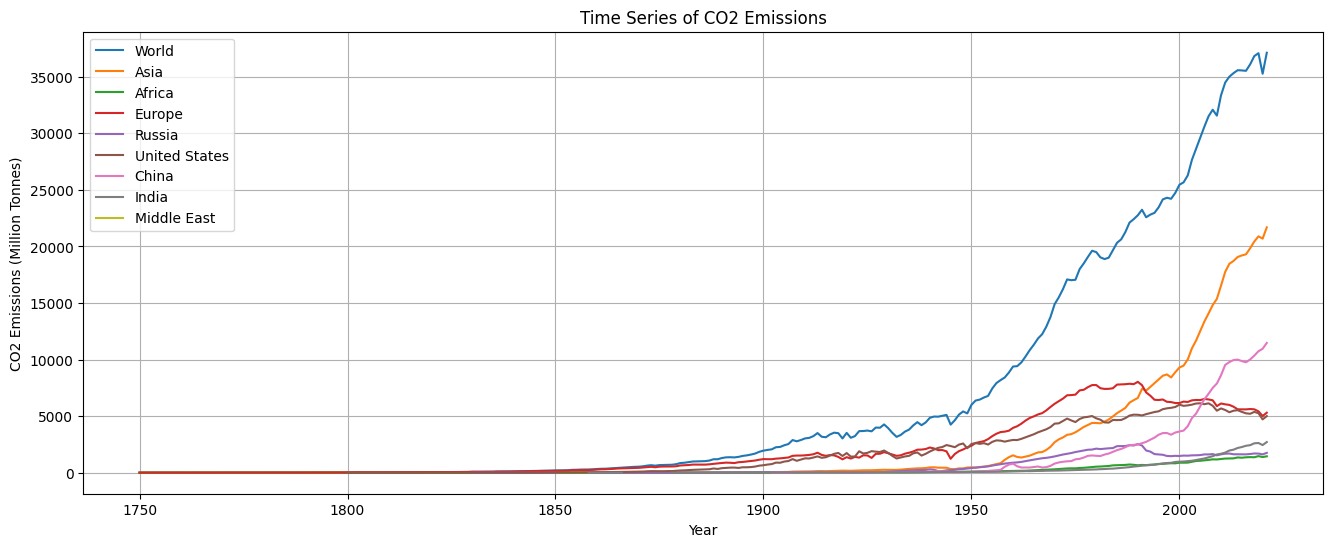

In [ ]:
# Function to plot time series of CO2 emissions for specific countries
def plot_co2_time_series(df, countries):
    plt.figure(figsize=(16, 6))

    for country in countries:
        country_df = df[df['country'] == country]
        plt.plot(country_df['year'], country_df['co2'], label=country)

    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (Million Tonnes)')
    plt.title('Time Series of CO2 Emissions')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_co2_time_series(df_owid, ['World', 'Asia', 'Africa', 'Europe', 'Russia', 'United States', 'China', 'India', 'Middle East'])

### Top CO2 Emitters by Year

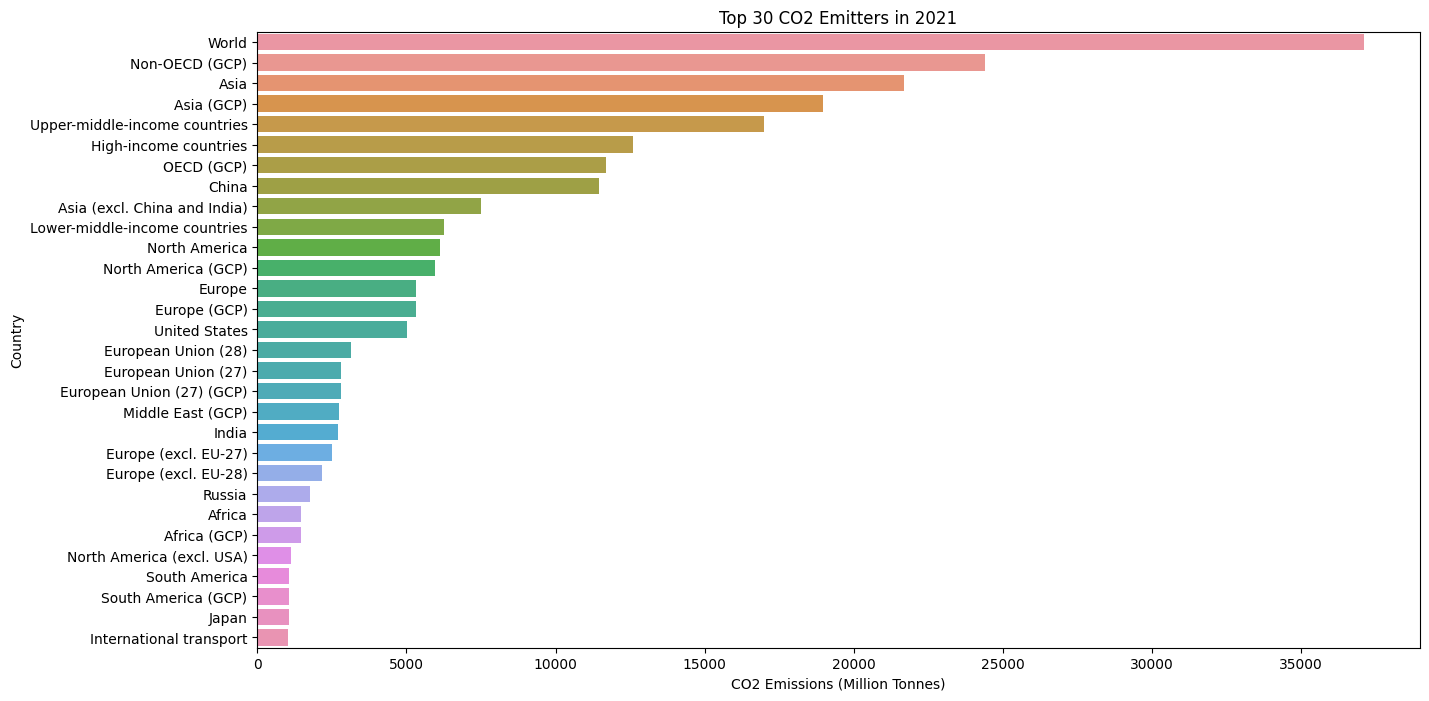

In [ ]:
# Bar chart of top CO2 emitters for a specific year
def plot_top_emitters_barplot(df, year, top_n=10):
    year_df = df[df['year'] == year]
    top_emitters = year_df.nlargest(top_n, 'co2')
    plt.figure(figsize=(15, 8))
    sns.barplot(x='co2', y='country', data=top_emitters)
    plt.xlabel('CO2 Emissions (Million Tonnes)')
    plt.ylabel('Country')
    plt.title(f'Top {top_n} CO2 Emitters in {year}')
    plt.show()

plot_top_emitters_barplot(df_owid, 2021, top_n=30)

From the above plot we can see that if we talk about countries then China contributes to CO2 emissions the most.

### Animated Choropleth Map for CO2 Emissions over Time

In [ ]:
# Function to create an animated choropleth map for CO2 emissions by country over time
def animated_choropleth_map(df):
    # Group and aggregate the data by year and country to calculate total CO2 emissions for each country
    aggregated_df = df.groupby(['year', 'country']).sum().reset_index()

    # Create the animated choropleth map using Plotly Express with 'Viridis' color scale
    fig = px.choropleth(aggregated_df, locations='country', locationmode='country names', color='co2', animation_frame='year',
                        labels={'country': 'Country', 'co2': 'CO2 Emissions (Million Tonnes)'},
                        title='Animated Choropleth Map for CO2 Emissions by Country Over Time',
                        color_continuous_scale='YlGnBu')

    # Show the Plotly figure
    fig.show()

animated_choropleth_map(df_owid)

<ipython-input-81-6cb259177e54>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### CO2 Emissions by Emission Type for Different Years

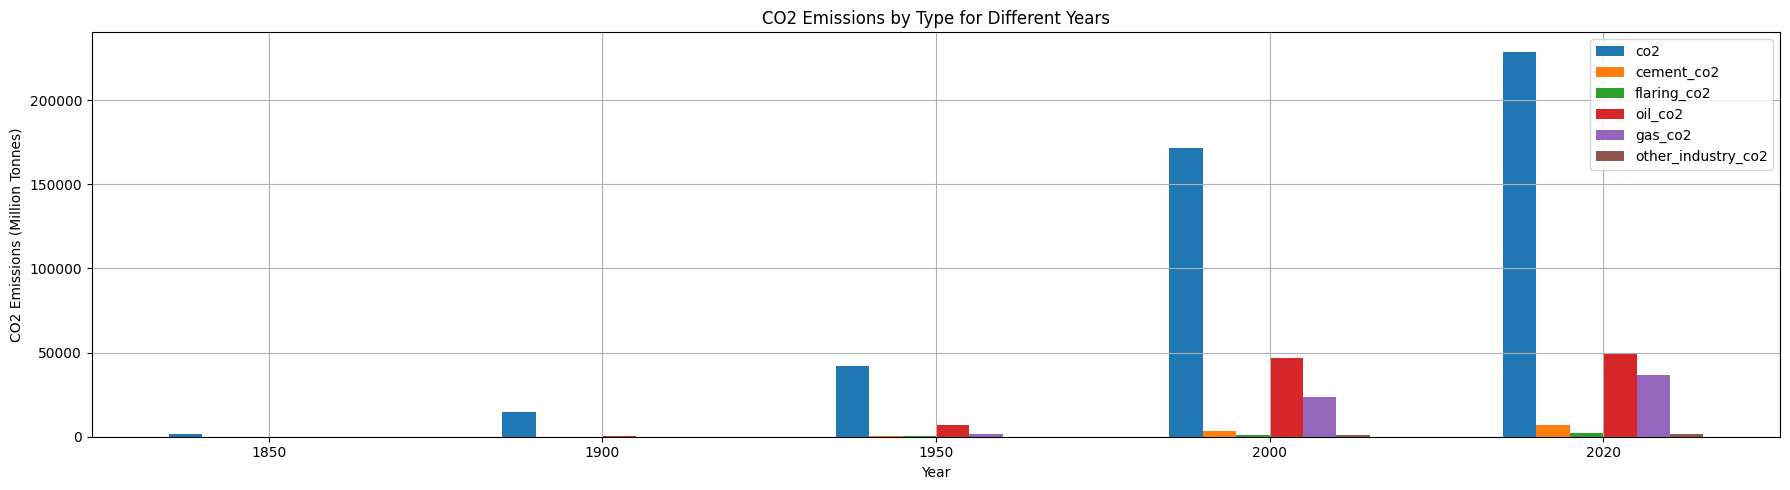

In [ ]:
# Function to create a grouped bar chart for different types of CO2 emissions over years
def grouped_bar_chart_co2_emissions(df, years_list, co2_types_list):
    # Filter the dataframe for the specified years and CO2 types
    filtered_df = df[df['year'].isin(years_list)][['year'] + co2_types_list]

    # Group and aggregate the data by year to calculate total CO2 emissions for each type
    aggregated_df = filtered_df.groupby('year')[co2_types_list].sum()

    # Set the width of the bars and the positions of the x-axis ticks
    bar_width = 0.1
    x = np.arange(len(years_list))

    # Plot the grouped bar chart
    plt.figure(figsize=(18, 5))
    for i, co2_type in enumerate(co2_types_list):
        plt.bar(x + (i * bar_width), aggregated_df[co2_type], width=bar_width, label=co2_type)

    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (Million Tonnes)')
    plt.title('CO2 Emissions by Emission Type for Different Years')
    plt.xticks(x + (bar_width * (len(co2_types_list) - 1) / 2), years_list)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


years_to_plot = [1850, 1900, 1950, 2000, 2020]
co2_types_to_plot = ['co2', 'cement_co2', 'flaring_co2', 'oil_co2', 'gas_co2', 'other_industry_co2']
grouped_bar_chart_co2_emissions(df_owid, years_list=years_to_plot, co2_types_list=co2_types_to_plot)

From the above plot, we can observe that **oil_co2** emissions have risen steadily from the year 1950 to 2020. Additionally, other industry-related co2 emissions also increased after 1950.


*   **co2**: Annual total production-based emissions of carbon dioxide (CO₂), excluding land-use change, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*   **cement_co2**: Annual production-based emissions of carbon dioxide (CO₂) from cement, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*   **coal_co2**: Annual production-based emissions of carbon dioxide (CO₂) from coal, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*   **flaring_co2**: Annual production-based emissions of carbon dioxide (CO₂) from flaring, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*   **gas_co2**: Annual production-based emissions of carbon dioxide (CO₂) from gas, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*   **oil_co2**: Annual production-based emissions of carbon dioxide (CO₂) from oil, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.
*   **other_industry_co2**: Annual production-based emissions of carbon dioxide (CO₂) from other industry sources, measured in million tonnes. This is based on territorial emissions, which do not account for emissions embedded in traded goods.










### Different Types of CO2 Emissions over Time

In [ ]:
# Function to create a time series plot for specific country and list of columns using Plotly
def time_series_plot_for_country(df, country_name, columns_list):
    # Filter the dataframe for the specified country
    filtered_df = df[df['country'] == country_name]

    # Create subplots with increased figure height
    fig = make_subplots(rows=len(columns_list), cols=1, subplot_titles=columns_list, vertical_spacing=0.08)

    # Add the time series traces for each column
    for i, column in enumerate(columns_list):
        fig.add_trace(go.Scatter(
            x=filtered_df['year'],
            y=filtered_df[column],
            mode='lines',
            name=column
        ), row=i+1, col=1)

    # Update the layout and axis labels for each subplot
    for i in range(len(columns_list)):
        fig.update_xaxes(title_text='Year', row=i+1, col=1)
        # fig.update_yaxes(title_text='CO2 Emission (Million Tonnes)', row=i+1, col=1)

    # Show the Plotly figure
    fig.update_layout(
        title=f'Time Series Plot for {country_name}',
        showlegend=False,
        height=2000  # Increase the figure height (adjust this value as needed)
    )
    fig.show()


country_to_plot = 'World'
columns_to_plot = ['co2', 'cement_co2', 'coal_co2', 'consumption_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2']
time_series_plot_for_country(df_owid, country_name=country_to_plot, columns_list=columns_to_plot)

For the above plot the Y-axis shows emissions in Million Tonnes. Looks like there is a lot missing data for earlier years for different co2 emission types. May be data is not available for these certain types of emissions or may be these certain types of emissions did not exist back then.

### Heatmap to show Correlation between different columns

In [ ]:
# Select a subset of relevant columns for CO2 emissions analysis
relevant_columns = ['co2', 'gdp', 'population', 'cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'other_industry_co2']

# Subset the dataframe with relevant columns
df_subset = df_owid[relevant_columns]
# Summary statistics of relevant columns
display(df_subset.describe())

,co2,gdp,population,cement_co2,coal_co2,flaring_co2,gas_co2,other_industry_co2
count,31349.000000,1.456400e+04,4.000800e+04,24974.000000,25069.000000,24875.000000,24943.000000,2386.000000
mean,380.237549,2.677586e+11,5.926810e+07,8.392491,154.397708,3.493835,50.080671,18.430048
std,1801.527942,2.103151e+12,3.222866e+08,63.009433,751.452722,20.297656,309.874967,41.863198
min,0.000000,4.998000e+07,2.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,7.516679e+09,3.198618e+05,0.000000,0.000000,0.000000,0.000000,0.849500
50%,3.109000,2.597999e+10,2.323117e+06,0.010000,0.655000,0.000000,0.000000,3.030000
75%,43.730000,1.132942e+11,9.802751e+06,0.692000,16.525000,0.000000,1.231000,12.763000
max,37123.852000,1.136302e+14,7.909295e+09,1672.592000,15051.513000,439.254000,7921.830000,306.639000


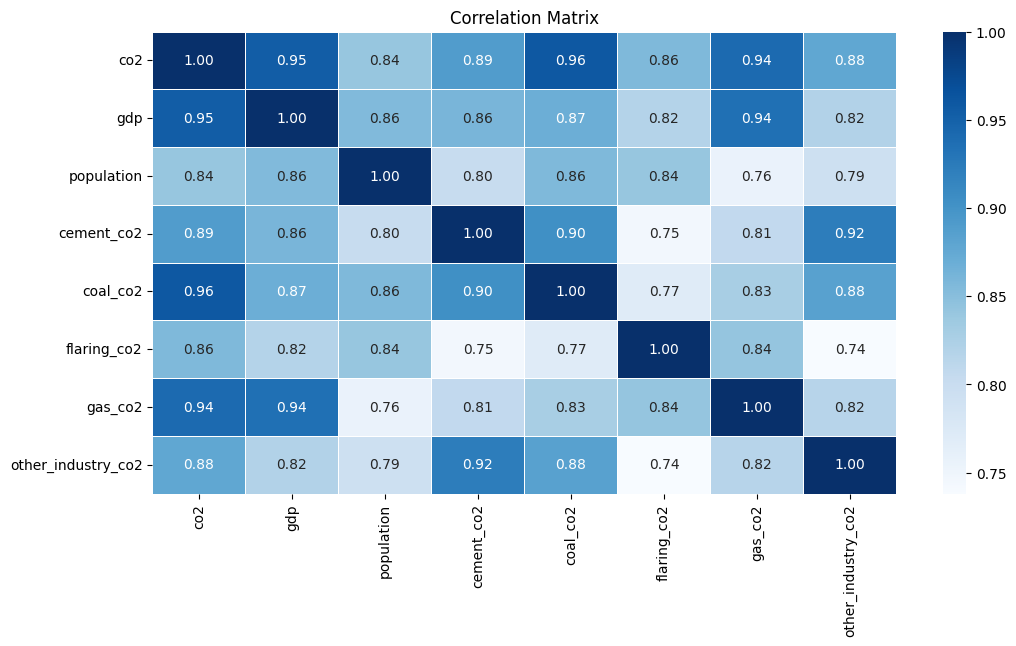

In [ ]:
# Correlation matrix of relevant columns
correlation_matrix = df_subset.corr() # df_subset.drop(['year'], axis = 1).corr()
# Create the heatmap using Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

From the heatmap we can see a strong correlation of gdp & population with different types of co2 emissions.

# Summary


1.   CO2 emissions have been increasing steadily with an exception of the year 2020 where there was a drop because of the covid.
2.   High income countries contribute more to the CO2 emissions.
3.   Since around 1950, oil and gas-related CO2 emissions have been increasing rapidly.
4.   There is a strong correlation of gdp & population with different types of co2 emissions.      
   



In [ ]:
z